**CSI 4142 Data Science** <br/>
*Assignment 1: Dataset Insights*

# Identification

Name: Eli Wynn<br/>
Student Number: 300248135

Name: Jack Snelgrove<br/>
Student Number: 300247435


Our datasets have been uploaded from the public repository:

- [github.com/eli-wynn/Datasets](https://github.com/eli-wynn/Datasets)

# Introduction

The goal of this report is to perform data analysis on a heart attack database and student placement dataset. The audience would be the general public wanting to learn about factors that could lead to a heart attack and students/educators wanting to examine student results after graduation respectively.

Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Importing Datasets

In [21]:
heart  = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/heart.csv"
placement = "https://raw.githubusercontent.com/eli-wynn/Datasets/refs/heads/main/placementdata.csv"
heartData = pd.read_csv(heart)
placementData = pd.read_csv(placement)
placementDataML = placementData.copy()

# Dataset Descriptions
## [Placement Data](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset/data)
Author: RK <br>
Purpose: This dataset contains information about the students academic and training and placement status<br>
Shape: Columns: 12, Rows: 10000<br>
## [Heart Data](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
Author: fedesoriano <br>
Purpose:<br>
Shape: Columns: 12, Rows: 918<br>

# Heart Failure Prediction Insights

All the proof of the insights is present in the code and subsequent table directly below the insight

1. The risk of heart problems increases dramatically after age 40 and drops off after 60. It is interesting that there is a drop off with age. Is that due to less older people being included in the data? or less older people surviving with a heart condition?

In [ ]:
plt.hist(heartData['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

2. Approximately _% of individuals included have heart disease

In [ ]:
#code for a countplot from case study in class
sns.countplot(x="HeartDisease", palette="pastel", data=heartData)
plt.title("Individuals With Heart Disease")
plt.xlabel('Heart Disease(0 = Healthy, 1 = Diseased)')
plt.ylabel('Count')
plt.show()

## Placement Insight

All insights are initiated with a question. Code is provided for a visualization that answers this question. The insight derived from these graphs are provided in the cell under the graph. 

1. How many student got Placed vs Not placed?

In [ ]:
# Univariate: Categorical - r2

#Creates a pandas Series that represnts the count of students who are Placed vs NotPlaced
status_counts = placementData['PlacementStatus'].value_counts()

#Define the figure size
plt.figure(figsize=(8, 6))

#Creates a bar chart with the status_counts Series
status_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Add labels and title
plt.title('Count of PlacementStatus', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add the exact count on top of each bar
plt.text(1, status_counts['Placed'] + 1, f"{status_counts['Placed']}", ha='center', fontsize=12)
plt.text(0, status_counts['NotPlaced'] + 1, f"{status_counts['NotPlaced']}", ha='center', fontsize=12)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


Insight #1: Based on the chart above, ~58% of the students were placed in internships <br><br>
1. Did the number of completed internships effect the number of students who got placed? 

In [ ]:
# Bivarite: Categorical / Numerical 

# Grouping data by PlacementStatus and Internships
status_internship_counts = placementData.groupby(['PlacementStatus', 'Internships']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
status_internship_counts.plot(kind='bar', width=0.7, edgecolor='black', colormap='coolwarm', figsize=(10, 6))

# Adding labels and title
plt.title('Placement Status by Number of Internships', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Internships')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

Insight #2: Based on the graph above, the majority of students who had 2 internships completed were able to get Placed. For Students who have only completed one or no internships had a higher chance of not placing than being placed. 

3. Did students who got placed have better CGPAs than those who didnt?


In [ ]:
# Bivariate: Categorical / Numerical - r7

# Define bins from minimum to maximum CGPA, at 0.5 intervals
min_cgpa = min(placementData['CGPA'])
max_cgpa = max(placementData['CGPA'])
bins = np.arange(min_cgpa, max_cgpa + 0.5, 0.5)  # Step size of 0.5

# Filter CGPA values based on PlacementStatus
placed_cgpa = placementData[placementData['PlacementStatus'] == 'Placed']['CGPA']
not_placed_cgpa = placementData[placementData['PlacementStatus'] == 'NotPlaced']['CGPA']

# Create the plot
plt.figure(figsize=(8, 6))

plt.hist(not_placed_cgpa, bins=bins, color='red', alpha=0.4, label='Not Placed', edgecolor='black', rwidth=0.9)
plt.hist(placed_cgpa, bins=bins, color='green', alpha=0.4, label='Placed', edgecolor='black', rwidth=0.9)



# Labels and title
plt.title('CGPA Distribution: Placed vs Not Placed', fontsize=16)
plt.xlabel('CGPA', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Set x-axis ticks at every 0.5 interval
plt.xticks(bins)

# Show legend and grid
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


Insight #3: It shows in the graph above that in the majority of cases students who got placed typically had higher CGPAs that those who did not. However, the graph also shows that some students who had a high CGPAs did not place and some students with low CGPAs were able to find placements. 

1. How are the student soft skills

In [ ]:
# Univariate: Numerical - r1

# Define figure size
plt.figure(figsize=(8, 6))

# Plot histogram for Soft Skills Rating 
plt.hist(placementData['SoftSkillsRating'], bins=10, color='purple', edgecolor='black', alpha=0.7)

# Labels and title
plt.title('Distribution of Soft Skills Ratings', fontsize=16)
plt.xlabel('Soft Skills Rating', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


Insight #4: The graph above is left skewed showing us that most of the students have high soft skills rating. 

5. How well did students do on their Aptitude tests?

In [ ]:
# Univariate: Grouped numerical  

bins = [0, 25 , 50, 75, 100]  # Define bin edges
labels = ['0-25', '21-50', '51-75', '76-100']  # Define labels for bins
placementData['ScoreCategory'] = pd.cut(placementData['AptitudeTestScore'], bins=bins, labels=labels, include_lowest=True)

# Count the number of students in each category
score_counts = placementData['ScoreCategory'].value_counts().sort_index()

# Define a gradient from red to green
gradient_colors = ['#FF0000', '#FF5500', '#AAFF00', '#00FF55']  # Smooth transition from red to green

# Define figure size
plt.figure(figsize=(8, 6))

# Create bar chart using Matplotlib with gradient colors
plt.bar(score_counts.index, score_counts.values, color=gradient_colors, edgecolor='black')

# Add labels and title
plt.title('Grouped Aptitude Test Score Distribution', fontsize=16)
plt.xlabel('Aptitude Test Score Category', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)


# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

Insight #5: Based on the graph above, we can see that all students passed their Aptitude test with the majority of students scoring above a 75%. We grouped scores in increments of 25% so that we can see a more simplified overview of the grades. I chose these intervals so we could see whether students got >50% (passed). 

6. Does a student having placement training have an effect on a student getting placed?

In [ ]:
# Bivariate: Categorical / Categorical - r4

# Count occurrences
count_data = placementData.groupby(['PlacementTraining', 'PlacementStatus']).size().unstack()

# Plot Stacked Bar Chart
count_data.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 6), edgecolor='black')

# Labels and title
plt.title('Effect of Training on Placement Status', fontsize=16)
plt.xlabel('Placement Training', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.legend(title='Placement Status')

# Show plot
plt.show()

Insight #6: Based on the graph above, there are very few students who got placed without being trained. However, there is a significant amount of students that got trained but still did not get placed. 

7. Is there a correlation between a students SSC marks and their HSC marks? 

In [ ]:
# Bivariate: Numerical / Numerical - r6 

# Define figure size
plt.figure(figsize=(8, 6))

# Create scatter plot
plt.scatter(placementData['SSC_Marks'], placementData['HSC_Marks'], color='blue', alpha=0.6, edgecolors='black')

# Add labels and title
plt.title('Scatter Plot: SSC Marks vs. HSC Marks', fontsize=16)
plt.xlabel('SSC Marks', fontsize=14)
plt.ylabel('HSC Marks', fontsize=14)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show plot
plt.show()

Insight #7: Based on the scatter-plot above, there does not seem to be a correlation between a students HSC Marks and their SSC Marks 

8. Did the number of completed projects effect students placement status?

In [ ]:
# Bivarite: Categorical / Numerical 

# Grouping data by PlacementStatus and Internships
status_internship_counts = placementData.groupby(['PlacementStatus', 'Projects']).size().unstack(fill_value=0)

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
status_internship_counts.plot(kind='bar', width=0.7, edgecolor='black', colormap='coolwarm', figsize=(10, 6))

# Adding labels and title
plt.title('Placement Status by Number of Projects', fontsize=16)
plt.xlabel('Placement Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Projects')

# Show grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

Insight #8: Based on the graph above, the majority of students who had done one or two projects did not get placed. Students who completed 3 projects were likely to get placed. Very few students had completed 0 projects. 

9. Would I be placed? 

In [ ]:

# ML specific imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Convert boolean categorical data to binary
placementDataML['PlacementStatus'] = LabelEncoder().fit_transform(placementData['PlacementStatus'])
placementDataML['ExtracurricularActivities'] = LabelEncoder().fit_transform(placementData['ExtracurricularActivities'])
placementDataML['PlacementTraining'] = LabelEncoder().fit_transform(placementData['PlacementTraining'])


# Define Features and Target of the dataset 
X = placementDataML.drop(columns=['PlacementStatus'])  # Features
y = placementDataML['PlacementStatus']  # Target 


# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print Results
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(class_report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Placed', 'Placed'], yticklabels=['Not Placed', 'Placed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Convert the input sample to a NumPy array and reshape it correctly
Pred_self = np.array([10001, 7.2, 3, 2, 0, 80, 4.5, 0, 1, 100, 100], dtype=float).reshape(1, -1)

# Apply the same scaling as training data
Pred_self_scaled = scaler.transform(Pred_self)

# Make a prediction
y_pred = model.predict(Pred_self_scaled)

# Output the prediction
print("Predicted Placement Status:", "Placed" if y_pred[0] == 1 else "Not Placed")



#Insight #9: Based on the data above, the machine learning moodel has an acuaracy rating of ~0.8. After adding a new row of data which represents myself, the machine learning model predicts (with 80% acuracy) that I would be placed. 

1.  Do students who participate in extra curricular activities have more workshops/certifications completed?

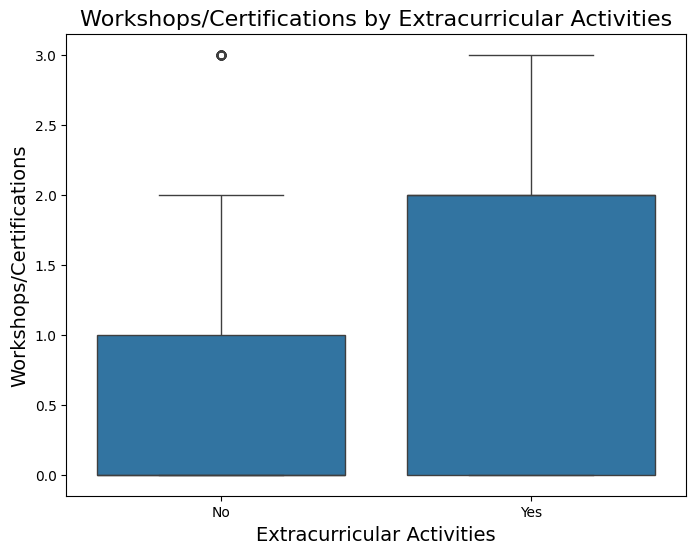

In [ ]:
# Define Figure size
plt.figure(figsize=(8, 6))

#Generate boxplot 
sns.boxplot(x='ExtracurricularActivities', y='Workshops/Certifications', data = placementData)

#Add lables
plt.title('Workshops/Certifications by Extracurricular Activities', fontsize=16)
plt.xlabel('Extracurricular Activities', fontsize=14)
plt.ylabel('Workshops/Certifications', fontsize=14)

#display plot
plt.show()


Insight #10: Based on the graph above, we can see that on average, students with extracurricular activities tend to hace more workshops and certifications. 